In [11]:
import copy
# used to prompt for user input
# when using this script internally, you may remove this and simply hard code in your username and password
import getpass
import json
import os
import re
import sys
import time
import traceback
import urllib
import urllib.request as request
import urllib.request as urlopen
from datetime import datetime
import requests
# this helps us do some debugging within the Python Notebook
# another optional component
from IPython.display import display
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.gis.server import Service


In [12]:
    online_username = input('Username: ')
    online_password = getpass.getpass('Password: ')
    online_connection = "https://www.arcgis.com"
    gis_online_connection = GIS(online_connection, online_username, online_password)
    gis_online_connection

Username: tbutcher_undesa
Password: ········


<Item title:"Indicator 2.c.1: Indicator of Food Price Anomalies (IFPA), wheat" type:Feature Layer Collection owner:tbutcher_undesa>
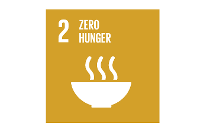

In [13]:
#access an Item
test_item = gis_online_connection.content.get('e3f9f209e936457da967a69fddb2e453')
test_item

In [16]:
test_feature_layer = test_item.layers[0]
test_feature_layer.properties
renderer_definition = {"type":"classBreaksDef","classificationField":"latest_value",
                       "classificationMethod":"esriClassifyNaturalBreaks","breakCount":5,
                        "baseSymbol":{"type": "esriSMS","style": "esriSMSCircle","size": 10,
                                         "color": [76,115,0,255]}}
renderer = test_item.layers[0].generate_renderer(definition=renderer_definition, where=None)
renderer["defaultSymbol"] = {"type": "esriSMS","style": "esriSMSCircle","size": 10,"color": [0,0,0,0], "outline" : {"symbol": {"type": "esriSLS","style": "esriSLSSolid","color": ["#000000"],"width": 1}}}
renderer

{'type': 'classBreaks',
 'field': 'latest_value',
 'defaultSymbol': {'type': 'esriSMS',
  'style': 'esriSMSCircle',
  'size': 10,
  'color': [0, 0, 0, 0],
  'outline': {'symbol': {'type': 'esriSLS',
    'style': 'esriSLSSolid',
    'color': ['#000000'],
    'width': 1}}},
 'defaultLabel': '',
 'minValue': 0.54541167,
 'classBreakInfos': [{'classMaxValue': 0.54541167,
   'label': '0.5454',
   'description': '',
   'symbol': None},
  {'classMaxValue': 0.70927583,
   'label': '0.5454 - 0.7093',
   'description': '',
   'symbol': None},
  {'classMaxValue': 1.16745417,
   'label': '0.7093 - 1.1675',
   'description': '',
   'symbol': None},
  {'classMaxValue': 1.19277,
   'label': '1.1675 - 1.1928',
   'description': '',
   'symbol': None},
  {'classMaxValue': 2.310926,
   'label': '1.1928 - 2.3109',
   'description': '',
   'symbol': None}]}

In [5]:
size = 10
for classBreak in renderer["classBreakInfos"]:
    classBreak["symbol"] = {"type": "esriSMS","style": "esriSMSCircle","size": size,"color": [76,115,0,255]}
    size += 2
    print(classBreak)
    

{'classMaxValue': 0.7344625, 'label': '0.5588 - 0.7345', 'description': '', 'symbol': {'type': 'esriSMS', 'style': 'esriSMSCircle', 'size': 10, 'color': [76, 115, 0, 255]}}
{'classMaxValue': 1.2901458, 'label': '0.7345 - 1.2901', 'description': '', 'symbol': {'type': 'esriSMS', 'style': 'esriSMSCircle', 'size': 12, 'color': [76, 115, 0, 255]}}
{'classMaxValue': 1.995815, 'label': '1.2901 - 1.9958', 'description': '', 'symbol': {'type': 'esriSMS', 'style': 'esriSMSCircle', 'size': 14, 'color': [76, 115, 0, 255]}}
{'classMaxValue': 2.9009383, 'label': '1.9958 - 2.9009', 'description': '', 'symbol': {'type': 'esriSMS', 'style': 'esriSMSCircle', 'size': 16, 'color': [76, 115, 0, 255]}}
{'classMaxValue': 15.6271025, 'label': '2.9009 - 15.6271', 'description': '', 'symbol': {'type': 'esriSMS', 'style': 'esriSMSCircle', 'size': 18, 'color': [76, 115, 0, 255]}}


In [19]:
visual_params = {"drawingInfo":{"renderer":{"visualVariables":[{"type":"sizeInfo","field":"latest_value","valueExpression":"","valueUnit":"unknown","minSize":6,"maxSize":37.5,"minDataValue":0.51504,"maxDataValue":7.4918925}],"authoringInfo":{"visualVariables":[{"type":"sizeInfo","minSliderValue":0.51504,"maxSliderValue":7.4918925}]},"type":"classBreaks","field":"latest_value","defaultSymbol":{"color":[128,128,128,131],"size":6,"angle":0,"xoffset":0,"yoffset":0,"type":"esriSMS","style":"esriSMSCircle","outline":{"color":[153,153,153,255],"width":0.75,"type":"esriSLS","style":"esriSLSSolid"}},"minValue":-9007199254740991,"classBreakInfos":[{"symbol":{"color":[227,139,79,255],"size":6,"angle":0,"xoffset":0,"yoffset":0,"type":"esriSMS","style":"esriSMSCircle","outline":{"color":[255,255,255,255],"width":0.75,"type":"esriSLS","style":"esriSLSSolid"}},"classMaxValue":9007199254740991}],"defaultLabel":"Other"},"transparency":20}}
visual_params

{'drawingInfo': {'renderer': {'visualVariables': [{'type': 'sizeInfo',
     'field': 'latest_value',
     'valueExpression': '',
     'valueUnit': 'unknown',
     'minSize': 6,
     'maxSize': 37.5,
     'minDataValue': 0.51504,
     'maxDataValue': 7.4918925}],
   'authoringInfo': {'visualVariables': [{'type': 'sizeInfo',
      'minSliderValue': 0.51504,
      'maxSliderValue': 7.4918925}]},
   'type': 'classBreaks',
   'field': 'latest_value',
   'defaultSymbol': {'color': [128, 128, 128, 131],
    'size': 6,
    'angle': 0,
    'xoffset': 0,
    'yoffset': 0,
    'type': 'esriSMS',
    'style': 'esriSMSCircle',
    'outline': {'color': [153, 153, 153, 255],
     'width': 0.75,
     'type': 'esriSLS',
     'style': 'esriSLSSolid'}},
   'minValue': -9007199254740991,
   'classBreakInfos': [{'symbol': {'color': [227, 139, 79, 255],
      'size': 6,
      'angle': 0,
      'xoffset': 0,
      'yoffset': 0,
      'type': 'esriSMS',
      'style': 'esriSMSCircle',
      'outline': {'color

In [34]:
feature_set = test_item.layers[0].query(where='1=1',out_statistics= [{"statisticType": "max",
    "onStatisticField": "latest_value", 
    "outStatisticFieldName": "latest_value_max"
  },
  {"statisticType": "min",
    "onStatisticField": "latest_value", 
    "outStatisticFieldName": "latest_value_min"}])
print('max:' + feature_set.features[0].attributes["latest_value_max"] + 
      " min: "+ feature_set.features[0].attributes["latest_value_min"])

max_value = feature_set.features[0].attributes["latest_value_max"]
min_value = feature_set.features[0].attributes["latest_value_min"]


   

max:2.310926 min: 0.54541167


In [43]:
#update the visual variable with the min and max
visual_params["drawingInfo"]["renderer"]["visualVariables"][0]["minDataValue"] = min_value
visual_params["drawingInfo"]["renderer"]["visualVariables"][0]["maxDataValue"] = max_value

visual_params["drawingInfo"]["renderer"]["authoringInfo"]["visualVariables"][0]["minSliderValue"] = min_value
visual_params["drawingInfo"]["renderer"]["authoringInfo"]["visualVariables"][0]["maxSliderValue"] = max_value
visual_params["drawingInfo"]["renderer"]["classBreakInfos"][0]["symbol"]["color"] = "#000000"
visual_params



{'drawingInfo': {'renderer': {'visualVariables': [{'type': 'sizeInfo',
     'field': 'latest_value',
     'valueExpression': '',
     'valueUnit': 'unknown',
     'minSize': 6,
     'maxSize': 37.5,
     'minDataValue': '0.54541167',
     'maxDataValue': '2.310926'}],
   'authoringInfo': {'visualVariables': [{'type': 'sizeInfo',
      'minSliderValue': '0.54541167',
      'maxSliderValue': '2.310926'}]},
   'type': 'classBreaks',
   'field': 'latest_value',
   'defaultSymbol': {'color': [128, 128, 128, 131],
    'size': 6,
    'angle': 0,
    'xoffset': 0,
    'yoffset': 0,
    'type': 'esriSMS',
    'style': 'esriSMSCircle',
    'outline': {'color': [153, 153, 153, 255],
     'width': 0.75,
     'type': 'esriSLS',
     'style': 'esriSLSSolid'}},
   'minValue': -9007199254740991,
   'classBreakInfos': [{'symbol': {'color': '#000000',
      'size': 6,
      'angle': 0,
      'xoffset': 0,
      'yoffset': 0,
      'type': 'esriSMS',
      'style': 'esriSMSCircle',
      'outline': {'col

In [21]:
definition_item = test_item.layers[0]
definition_update_params = definition_item.properties
definition_update_params["drawingInfo"]["renderer"] = visual_params["drawingInfo"]["renderer"]
if "editingInfo" in definition_update_params:
    del definition_update_params["editingInfo"]
definition_update_params
definition_item.manager.update_definition(definition_update_params)

#.url + "?f=json&token=" + gis_online_connection._con.token
#definition_url

#get the full service definition back in JSON
#definition_json_request = requests.get(definition_url)
#definition_json_data = json.loads(definition_json_request.content.decode("UTF-8"))
#definition_json_data

{'success': True}